In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
# import swifter
import csv
import fastText
from fasttext import train_supervised

### Read Data():
    Load json file into pandas dataframe

In [9]:
with open("data/Jan2020Frontiers.jsonl") as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)

In [3]:
data.head()

,id,text,journal
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology


In [10]:
length = len(data)
print('number of rows in the data: ' + str(len(data)))

number of rows in the data: 2528


### 2528 rows in the data set

### Label Distribution 

number of total journals: 64


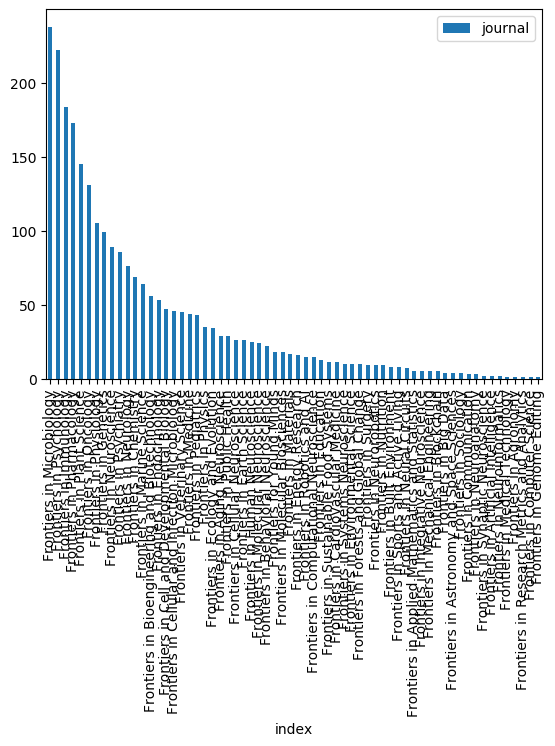

In [8]:
label_counts = data['journal'].value_counts().reset_index()
ax = label_counts.plot.bar(x='index', y='journal', rot=90)
print('number of total journals: '+str(data['journal'].nunique()))
plt.show()

### Preprocess text:
    Stem
    Remove Non Words
    Remove English Stop Words
    Remove http links

In [7]:
def process_text(text):
    """Process text function.
    Input:
        text: a string containing a text
    Output:
        texts_clean: a list of words containing the processed text

    """
    stemmer = PorterStemmer()
    
    stopwords_english = stopwords.words('english')
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    
    tokenizer = RegexpTokenizer(r'\w+')

    text_tokens = tokenizer.tokenize(text)

    texts_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # texts_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            texts_clean.append(stem_word)
    clean_sentence = ' '.join(texts_clean)

    return clean_sentence

### Use FastText for Multi-Class Text Classification:
    Provides an efficient way of learning embeddings and then doing text classification using soft-max loss.
    Softmax Loss = Softmax activation + Cross Entropy Loss
    Softmax activation = e^z/(\sum_z e^z)
### Convert into FastText Format:
    Replace spaces in strings by hiphens
    add prefix __label__
    preprocess text

In [4]:
data['journal'] = data['journal'].str.replace(' ', '-')

data['label'] = '__label__' + data['journal']
data['clean_text'] = data.apply(lambda x: process_text(x['text']), axis = 1)
data['output'] = data['label'] + ' ' + data['clean_text']

### Form Train and Test Files by shuffling the data first to have all the labels and then form training file by taking 70% of the rows and test as last 30% of the rows. 

In [5]:
shuffled_data = data.iloc[np.random.permutation(len(data))]
train_rows = math.floor((len(data)*70)/100)
test_rows = math.ceil(len(data) - train_rows)
print(train_rows)
print(test_rows)
train_data = shuffled_data[['output']].head(train_rows)
test_data = shuffled_data[['output']].tail(test_rows)
train_data.to_csv('train_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
test_data.to_csv('test_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)

1769
759


In [25]:
print('starting training')       
model = train_supervised('train_file')
print('trained the model ...')   
result = model.test('test_file')
result

(759, 0.09617918313570488, 0.09617918313570488)

### Test Statistics:
    Number of samples in the test: 759
    Precision@1: 0.1
    Recall@1: 0.1

In [40]:
with open("data/Jan2020Frontiers.jsonl") as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)

In [43]:
counts = data['journal'].value_counts()

data_less_than_1 = data.loc[data['journal'].isin(counts.index[counts == 1])]

print('Out of '+str(len(data))+', '+ str(len(data_less_than_1)) +' have 1 submission')

Out of 2528, 5 have 1 submission


### Remove Infrequent Journals

In [36]:
with open("data/Jan2020Frontiers.jsonl") as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)

### Remove Journals, which have less than 1 article submission

In [34]:
counts = data['journal'].value_counts()

data = data.loc[data['journal'].isin(counts.index[counts > 1])]
data['journal'] = data['journal'].str.replace(' ', '-')

data['label'] = '__label__' + data['journal']
data['clean_text'] = data.apply(lambda x: process_text(x['text']), axis = 1)
data['output'] = data['label'] + ' ' + data['clean_text']

shuffled_data = data.iloc[np.random.permutation(len(data))]
train_rows = math.floor((len(data)*70)/100)
test_rows = math.ceil(len(data) - train_rows)
print(train_rows)
print(test_rows)
train_data = shuffled_data[['output']].head(train_rows)
test_data = shuffled_data[['output']].tail(test_rows)
train_data.to_csv('train_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
test_data.to_csv('test_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
print('starting training')       
model = train_supervised('train_file')
print('trained the model ...')
result = model.test('test_file')
result

1766
757
starting training
trained the model ...


(757, 0.10303830911492734, 0.10303830911492734)

In [37]:
counts = data['journal'].value_counts()

data = data.loc[data['journal'].isin(counts.index[counts > 10])]
data['journal'] = data['journal'].str.replace(' ', '-')

data['label'] = '__label__' + data['journal']
data['clean_text'] = data.apply(lambda x: process_text(x['text']), axis = 1)
data['output'] = data['label'] + ' ' + data['clean_text']

shuffled_data = data.iloc[np.random.permutation(len(data))]
train_rows = math.floor((len(data)*70)/100)
test_rows = math.ceil(len(data) - train_rows)
print(train_rows)
print(test_rows)
train_data = shuffled_data[['output']].head(train_rows)
test_data = shuffled_data[['output']].tail(test_rows)
train_data.to_csv('train_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
test_data.to_csv('test_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
print('starting training')       
model = train_supervised('train_file')
print('trained the model ...')
result = model.test('test_file')

1679
720
starting training
trained the model ...


In [44]:
result

(720, 0.10833333333333334, 0.10833333333333334)

### Hyperparameter Tuning:
    coupled with learning-rate 0.5, wordNgrams=2, and running epochs until 20

In [8]:
with open("data/Jan2020Frontiers.jsonl") as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)
counts = data['journal'].value_counts()

data = data.loc[data['journal'].isin(counts.index[counts > 10])]
data['journal'] = data['journal'].str.replace(' ', '-')

data['label'] = '__label__' + data['journal']
data['clean_text'] = data.apply(lambda x: process_text(x['text']), axis = 1)
data['output'] = data['label'] + ' ' + data['clean_text']

shuffled_data = data.iloc[np.random.permutation(len(data))]
train_rows = math.floor((len(data)*70)/100)
test_rows = math.ceil(len(data) - train_rows)
print(train_rows)
print(test_rows)
train_data = shuffled_data[['output']].head(train_rows)
test_data = shuffled_data[['output']].tail(test_rows)
train_data.to_csv('train_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
test_data.to_csv('test_file', header=False, sep='|', escapechar='\\', quoting=csv.QUOTE_NONE, index=False)
print('starting training')       
model = train_supervised('train_file', lr = 0.5, wordNgrams=2, epoch=20)
print('trained the model ...')
result = model.test('test_file')
print(result)

1679
720
starting training
trained the model ...
(720, 0.2833333333333333, 0.2833333333333333)
